# <U> Linear Regression on training data</U>

In [1]:
#problem statement is to predict loan amount for people belonging 
#to rural India who dont have a credit score.

### Importing required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sc
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
%matplotlib inline

### Loading our dataset into a DataFrame

In [3]:
df=pd.read_csv("./trainingData.csv")

### Understanding the data

In [4]:
df.head() #we understand that we can drop the id column as it is not required.

,Id,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,...,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,1,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,...,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,2,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,...,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,3,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,...,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,4,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,...,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,5,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,...,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [5]:
df.dtypes #here we want to predict loan amount ie loan amount is our target variable.

Id                         int64
city                      object
age                        int64
sex                       object
social_class              object
primary_business          object
secondary_business        object
annual_income            float64
monthly_expenses         float64
old_dependents             int64
young_dependents           int64
home_ownership           float64
type_of_house             object
occupants_count            int64
house_area               float64
sanitary_availability    float64
water_availabity         float64
loan_purpose              object
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

In [6]:
df.shape#we are working with 21 columns and 40000 rows.

(40000, 21)

In [7]:
#checking if there are any null values present in our data 
df.info()
#we can see that variables/columns like city social_class primary_buisness etc all have some null/missing values 
#inside them.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 21 columns):
Id                       40000 non-null int64
city                     38136 non-null object
age                      40000 non-null int64
sex                      40000 non-null object
social_class             34745 non-null object
primary_business         39974 non-null object
secondary_business       34759 non-null object
annual_income            40000 non-null float64
monthly_expenses         39880 non-null float64
old_dependents           40000 non-null int64
young_dependents         40000 non-null int64
home_ownership           39621 non-null float64
type_of_house            39306 non-null object
occupants_count          40000 non-null int64
house_area               40000 non-null float64
sanitary_availability    39792 non-null float64
water_availabity         34747 non-null float64
loan_purpose             39974 non-null object
loan_tenure              40000 non-null int6

In [8]:
df.isnull().sum() #checking how many missing values are present in each variable/column

Id                          0
city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [9]:
df.describe()

,Id,age,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,occupants_count,house_area,sanitary_availability,water_availabity,loan_tenure,loan_installments,loan_amount
count,40000.00000,40000.00000,4.000000e+04,39880.000000,40000.000000,40000.00000,39621.000000,40000.000000,40000.000000,39792.000000,34747.000000,40000.000000,40000.000000,4.000000e+04
mean,20000.50000,55.15990,3.764021e+04,3810.875401,0.044900,1.13710,0.972489,26.641000,552.804750,0.686369,0.753216,12.032225,21.761175,8.412593e+03
std,11547.14972,3830.35566,2.873912e+04,4592.958009,0.222003,1.07384,0.163568,4749.995485,4596.921905,0.464028,0.255337,1.367473,16.682458,1.359694e+04
min,1.00000,2.00000,0.000000e+00,2.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.000000,-1.000000,3.000000,0.000000,1.000000e+02
25%,10000.75000,29.00000,1.440000e+04,2500.000000,0.000000,0.00000,1.000000,2.000000,200.000000,0.000000,0.500000,12.000000,12.000000,5.000000e+03
50%,20000.50000,35.00000,3.600000e+04,3500.000000,0.000000,1.00000,1.000000,3.000000,400.000000,1.000000,1.000000,12.000000,12.000000,8.000000e+03
75%,30000.25000,42.00000,5.600000e+04,4000.000000,0.000000,2.00000,1.000000,4.000000,600.000000,1.000000,1.000000,12.000000,50.000000,1.000000e+04
max,40000.00000,766105.00000,1.200000e+06,240000.000000,3.000000,7.00000,1.000000,950000.000000,700000.000000,1.000000,1.000000,84.000000,84.000000,1.343000e+06


###  Building an intital baseline model on the entire dataset

In [10]:
#we have understood that the id column is not important hence we can drop it.

In [11]:
df.drop('Id',axis=1,inplace=True)#dropping the id column.

In [12]:
df.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [13]:
df.columns

Index(['city', 'age', 'sex', 'social_class', 'primary_business',
       'secondary_business', 'annual_income', 'monthly_expenses',
       'old_dependents', 'young_dependents', 'home_ownership', 'type_of_house',
       'occupants_count', 'house_area', 'sanitary_availability',
       'water_availabity', 'loan_purpose', 'loan_tenure', 'loan_installments',
       'loan_amount'],
      dtype='object')

In [14]:
#building an initial baseline model.
basic_model=ols('loan_amount~city+age+sex+social_class+primary_business+secondary_business+annual_income+monthly_expenses+old_dependents+young_dependents+home_ownership+type_of_house+occupants_count+house_area+sanitary_availability+water_availabity+loan_purpose+loan_tenure+loan_installments',data=df).fit()

In [15]:
basic_model.summary()

e:\myenv\lib\site-packages\statsmodels\base\model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
e:\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
e:\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
e:\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.914
Method:                 Least Squares   F-statistic:                     247.7
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:42:57   Log-Likelihood:            -3.1533e+05
No. Observations:               33065   AIC:                         6.335e+05
Df Residuals:                   31631   BIC:                         6.456e+05
Df Model:                        1433                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                      2386.8652   3000.249      0.796      0.426   -3493.740    8267.470
city[T.(KODANGAL MANDAL) NARVA]                                               -1680.5509   4274.771     -0.393      0.694   -1.01e+04    6698.168
city[T.24 PARGANAS,SOUTH]                                                     -4160.3591   4254.037     -0.978      0.328   -1.25e+04    4177.719
city[T.752102]                                                                -4507.8251   3464.181     -1.301      0.193   -1.13e+04    2282.104
city[T.AINTHAPALI]                                                             4578.5425   2647.258      1.730      0.084    -610.187    9767.272
city[T.Ajidhya]                                                               -1418.9600   2891.392     -0.491      0.624   -7086.201    4248.281
city[T.Ajodhya]                                                               -3188.7563   2830.515     -1.127      0.260   -8736.676    2359.163
city[T.Alathur]                                                                -849.3454   2673.013     -0.318      0.751   -6088.555    4389.865
city[T.Amadi]                                                                 -4699.8565   4205.420     -1.118      0.264   -1.29e+04    3542.931
city[T.Amanara]                                                                2.088e-05   2.38e-06      8.769      0.000    1.62e-05    2.55e-05
city[T.Ambedkar Ward]                                                          3.111e-05   3.49e-06      8.922      0.000    2.43e-05    3.79e-05
city[T.Ambedkar ward]                                                             0.0001   1.24e-05      9.184      0.000    8.97e-05       0.000
city[T.Anand Bag]                                                                 0.0001   1.16e-05      9.293      0.000    8.47e-05       0.000
city[T.Anand Nagar]                                                            2.798e-05   3.02e-06      9.253      0.000    2.21e-05    3.39e-05
city[T.Anchumoorthy Mangalam]                                                  -2.54e-05   2.84e-06     -8.955      0.000    -3.1e-05   -1.98e-05
city[T.Angargadia]                                                            -2371.4630   2538.518     -0.934      0.350   -7347.057    2604.131
city[T.Anupshahr]                                                              7.647e+04   5167.361     14.799      0.000    6.63e+04    8.66e+04
city[T.Apila]                                                                 -1.614e-05   1.67e-06     -9.684      0.000   -1.94e-05   -1.29e-05
city[T.Appa rao g

### Visualizing and cleaning our dataset

In [16]:
#let us start with cleaning our dataset.

In [17]:
df.isnull().sum()

city                     1864
age                         0
sex                         0
social_class             5255
primary_business           26
secondary_business       5241
annual_income               0
monthly_expenses          120
old_dependents              0
young_dependents            0
home_ownership            379
type_of_house             694
occupants_count             0
house_area                  0
sanitary_availability     208
water_availabity         5253
loan_purpose               26
loan_tenure                 0
loan_installments           0
loan_amount                 0
dtype: int64

In [18]:
df.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [19]:
#we can see that the city variable has many missing values within it 

In [20]:
df.city.isnull().sum()#since a large number of rows are affected we cannot delete them directly

1864

In [21]:
#we will try and create a new city named test_city for all the rows which have city names as NaN
df[df.city.isna()].head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
3,NaN,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
7,NaN,28,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,40.0,1.0,0.5,Apparels,12,50,7500.0
10,NaN,25,F,OBC,Poultry farm,Daily wage labourer,40000.0,3000.0,0,0,1.0,T1,1,110.0,1.0,0.5,Meat Businesses,12,12,5000.0
12,NaN,34,F,OBC,Tailoring,none,95000.0,5200.0,1,4,1.0,T1,7,50.0,1.0,0.5,Apparels,12,50,7500.0
16,NaN,28,F,OBC,Cow Rearing,none,95000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Animal husbandry,12,50,7500.0


In [22]:
df[df.city.isna()].shape#1864 rows

(1864, 20)

In [23]:
df.city.unique()

array(['Dhanbad', 'Manjapra', nan, 'Nuapada', 'Plakkad', 'Palakkad',
       'Puri', 'Pusad', 'Yavatmal', 'Mathurapur', 'Gwalior', 'Noorsaray',
       'NUAPADA', 'Nilgiri', 'Niligiri', 'Balasore', 'Coimbatore',
       'Muzaffarpur', 'NPD', 'VHJHJ', 'WADHAWAN', 'Kolkata', 'Jhabua',
       'SURENDRANAGAR', 'Vadakkanchery', 'SURENDRAQNAGAR', 'Hazaribag',
       'Gopinath Pur', 'Ghourpur Chatti', 'Burdwan', 'Ghordour Chatti',
       'Ghourdour Chatti', 'Barabazar', 'Raina', 'Bishnupur',
       'Poddardih, Nirsa', 'Chirkunda', 'Mugma', 'Govindpur',
       'Kumardhubi', 'wadhawan', 'WAHWAN', 'surendranagar',
       'SUREDRANAGAR', 'WADHWAN', 'Joynagar', 'Mandla', 'Bankura',
       'Renghalo,(Rench)', 'NIMAPARA', 'Nilgir', 'Daspalla', 'Kalna',
       'Nirsa', 'Kudhani', 'Kuju', 'Noorsarai', 'vadakkencherry',
       'Panapana', 'Saraswatipur', 'Soro', 'Biharsharif', 'Bihar Sharif',
       'bihar sharif', 'Kumbi Bazar', 'Bisnupur', 'Terakhong', 'Kumbi',
       'Nabadwip', 'Vadakkencherry', 'COIM

In [24]:
df.city.fillna('test_city',inplace=True)

In [25]:
df.city.isnull().sum()#we have handled null values inside the city variable.

0

In [26]:
df.city.value_counts()

Pusad         3154
Bahoriband    1979
test_city     1864
PUSAD         1776
Shantipur     1727
              ... 
Dhu              1
Naudikera        1
Raichur          1
Mangoan          1
Kalale           1
Name: city, Length: 857, dtype: int64

In [27]:
#The next variable with missing values is social_class
df.social_class.isnull().sum() #again a large number of rows are affected hence we cannot directly drop the rows

5255

In [28]:
df.social_class.value_counts()#majority of the social_class is OBC

OBC               10683
SC                 3136
ST                 2616
General            2299
Muslim             1743
                  ...  
Padmshali             1
Genetal               1
Jaiswal               1
Lingayat  Vani        1
Ghisadi               1
Name: social_class, Length: 519, dtype: int64

In [29]:
df.social_class.unique()

array(['Mochi', 'OBC', 'Nai', 'Muchi', 'Kusbaha', 'Rajput', 'Gorai',
       'Bouri', 'Nil', 'SC', 'Mouchi', 'Teli', 'Broman', 'Tali', 'Muslim',
       'Ezhava', 'ST', 'Christian', 'Baniya', 'Modi', 'Toli', 'Kewat',
       'Noli', 'General', 'Shiv Nagar Goli', 'Janral', 'Hindu', 'S.C',
       'Sc', 'Minority', 'GEN', 'BC', 'Other', 'SU', 'Gen', 'MM',
       'Musilim', 'Chetty', 'ezhava', 'Yadav', 'Obc', 'Bodhi', 'Punjabi',
       'Pandit', 'Bhuiya', 'gen', 'Mushar', 'Gen- BPL', 'Gten', 'Kuravu',
       'Kumhar', 'Lohar', 'Chamar', 'Gowala', 'Chetti', 'Christians',
       'Naikan', 'VJNT', 'sc', 'ST Gond', 'MC', 's.c.', 'S.C.', 'GN',
       'Mushlim', 'Panjabi', 'Open', 'Vjnt', 'GC', 'NT', 'S.T.', 'Mannan',
       'Shiv', 'Nair', 'Pilla', 'Genl', 'AC', 'Hindhu', 'Nayakkan', 'obc',
       'st', 'Visawakarma', 'Viswakarma', 'Thandan', 'Sekh', 'Nt', 'St',
       'Minority comunity', 'Minority Comunity', 'Maniroty Comunity',
       'S.E.B.C', 'UJNT', 'Oraon', 'GENL', 'MINORITY', 'MBC', 'Marr

In [30]:
df[df.social_class.isna()]

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
3463,test_city,32,F,NaN,School,none,36000.0,7000.0,0,2,1.0,R,4,400.0,1.0,0.5,Education Loan,12,12,3000.0
3465,Jhabua,36,F,NaN,School,none,72000.0,5000.0,0,1,1.0,R,4,400.0,1.0,0.5,Education Loan,12,12,3000.0
7585,test_city,36,F,NaN,School,NaN,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,11500.0
7586,test_city,33,F,NaN,School,NaN,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7587,test_city,35,F,NaN,School,NaN,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12840,Jharkand,45,F,NaN,Goat rearing,NaN,0.0,5000.0,0,0,1.0,T1,0,0.0,0.0,NaN,Meat Businesses,12,12,5000.0
12841,Jharkand,45,F,NaN,Goat rearing,Others,0.0,5000.0,0,0,1.0,T1,0,0.0,0.0,NaN,Meat Businesses,12,12,5000.0
12842,Dhanbad,28,F,NaN,Tailoring,NaN,0.0,5000.0,0,0,1.0,NaN,0,0.0,0.0,NaN,Apparels,12,12,5000.0
12843,Dhanbad,28,F,NaN,Tailoring,Others,0.0,5000.0,0,0,1.0,NaN,0,0.0,0.0,NaN,Apparels,12,12,5000.0


In [31]:
df.social_class.fillna('OBC',inplace=True)#adding into OBC as it has a clear majority

In [32]:
df.social_class.isna().sum()

0

In [33]:
df.social_class.value_counts()

OBC               15938
SC                 3136
ST                 2616
General            2299
Muslim             1743
                  ...  
Padmshali             1
Genetal               1
Jaiswal               1
Lingayat  Vani        1
Ghisadi               1
Name: social_class, Length: 519, dtype: int64

In [34]:
#The next variable is primary_buisness

In [35]:
df.primary_business.value_counts()

Tailoring                      3971
Goat rearing                   2268
Cow Rearing                    2077
Handloom Work                  2068
Vegetable cultivation          1704
                               ... 
Pushcart Business                 1
Creche                            1
Tea Powder business               1
Owner of small grocery shop       1
Chumki stiching                   1
Name: primary_business, Length: 441, dtype: int64

In [36]:
df.primary_business.isna().sum()

26

In [37]:
df[df.primary_business.isna()]

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
5804,test_city,34,M,General,NaN,none,42000.0,3200.0,0,3,1.0,T1,5,180.0,1.0,0.5,NaN,12,50,5000.0
6031,H D Kote,42,F,Muslim,NaN,Daily wage labourer,8000.0,8000.0,0,0,1.0,T1,2,240.0,1.0,0.5,NaN,12,12,7000.0
6121,Mathurapur,44,F,GC,NaN,none,12000.0,5400.0,0,2,1.0,T1,4,350.0,1.0,0.5,NaN,12,50,8000.0
6125,Kumardhubi,34,M,Muslim,NaN,none,54000.0,3500.0,1,2,1.0,R,6,1100.0,1.0,0.5,NaN,12,12,5000.0
6300,Mathurapur,26,F,GC,NaN,none,9600.0,4000.0,0,2,1.0,T1,4,350.0,1.0,0.5,NaN,12,50,5000.0
6462,PUSAD,28,F,OBC,NaN,Others,24000.0,2500.0,0,1,1.0,T2,2,600.0,1.0,0.5,NaN,12,12,10000.0
6554,Chirkunda,27,F,Hindu,NaN,none,23000.0,4000.0,0,2,0.0,T1,5,300.0,1.0,0.5,NaN,12,12,5000.0
7031,Joynagar,30,F,GC,NaN,none,9600.0,3700.0,0,2,1.0,T1,4,250.0,1.0,0.5,NaN,12,50,5000.0
7412,Mathurapur,32,F,GC,NaN,none,12000.0,4200.0,0,2,1.0,T1,4,350.0,1.0,0.5,NaN,12,50,5000.0
7441,Kumardhubi,33,F,Muslim,NaN,none,50000.0,3200.0,0,4,1.0,R,6,600.0,1.0,0.5,NaN,12,12,5000.0


In [38]:
df.primary_business.unique()

array(['Tailoring', 'Beauty salon', 'General store',
       'Puffed rice business', 'Poultry farm', 'Tea stall', 'Cow Rearing',
       'Vegetable vendor', 'Banana Cultivation', 'Utensils selling',
       'Readymade Garments', 'Medical shop', 'Electronic goods shop',
       'Milk business', 'Grocery store', 'Carpenter/Wood business',
       'Goat rearing', 'Vegetable cultivation', 'Cattle rearing',
       'Brick manufacturing unit', 'Buffalo rearing', 'Wet grinding',
       'Petty shop', 'Rice business', 'Tiffin center', 'Betel shop',
       'Cycle repair shop', 'Bakery', 'Gram cultivation', 'Sweets shop',
       'Fancy Store', 'Laundry', 'Provision store', 'Snacks business',
       'Beauty parlour', 'Beedi rolling business', 'Eggs selling',
       'Embroidery work', 'Helmets selling', 'Auto Rickshaw',
       'Fish vendor', 'Artificial Flower Making', 'Paddy cultivation',
       'Leaf plate making', 'Stationery Shop', 'Paddy processing',
       'Pig rearing', 'Flower Business', 'Saree b

In [39]:
df.primary_business.fillna('others',inplace=True)

In [40]:
df.primary_business.isnull().sum()

0

In [41]:
#same thing with secondary buisness
df.secondary_business.unique() #we have ab Others here 

array(['Others', 'none', 'Agriculture', 'Daily wage labourer',
       'Livestock rearing', nan], dtype=object)

In [42]:
df.secondary_business.fillna('Others',inplace=True)

In [43]:
df.secondary_business.isnull().sum()

0

In [44]:
df.secondary_business.value_counts()

none                   27366
Others                  7805
Daily wage labourer     2545
Agriculture             2105
Livestock rearing        179
Name: secondary_business, dtype: int64

In [45]:
df.monthly_expenses.isnull().sum()

120

In [46]:
df.monthly_expenses.value_counts()

3000.0     6397
4000.0     6196
3500.0     3332
2000.0     3135
2500.0     2767
           ... 
6.0           1
72000.0       1
6917.0        1
6417.0        1
3.0           1
Name: monthly_expenses, Length: 260, dtype: int64

In [47]:
df[df.monthly_expenses.isnull()].head(30)#we can see that the majority of the people taking the loan are students as the remaining 
#fields also have NaN's for these rows and hence we have to set the monthly expenses as 0.0

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
7585,test_city,36,F,OBC,School,Others,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,11500.0
7586,test_city,33,F,OBC,School,Others,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7587,test_city,35,F,OBC,School,Others,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,6000.0
7588,test_city,32,F,OBC,School,Others,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7589,test_city,29,F,OBC,School,Others,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7590,test_city,28,F,OBC,School,Others,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,4500.0
7591,test_city,33,F,OBC,School,Others,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,7000.0
7592,test_city,28,F,OBC,School,Others,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,3500.0
7593,test_city,29,F,OBC,School,Others,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7594,test_city,30,F,OBC,School,Others,0.0,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,13000.0


In [48]:
df.monthly_expenses.fillna(0.0,inplace=True)

In [49]:
df.monthly_expenses.isna().sum()

0

In [50]:
df.monthly_expenses.describe()

count     40000.000000
mean       3799.442775
std        4590.796727
min           0.000000
25%        2500.000000
50%        3500.000000
75%        4000.000000
max      240000.000000
Name: monthly_expenses, dtype: float64

In [51]:
#the next variable is home ownership
df[df.home_ownership.isnull()].head(50)#

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
7585,test_city,36,F,OBC,School,Others,0.0,0.0,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,11500.0
7586,test_city,33,F,OBC,School,Others,0.0,0.0,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7587,test_city,35,F,OBC,School,Others,0.0,0.0,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,6000.0
7588,test_city,32,F,OBC,School,Others,0.0,0.0,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7589,test_city,29,F,OBC,School,Others,0.0,0.0,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7590,test_city,28,F,OBC,School,Others,0.0,0.0,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,4500.0
7591,test_city,33,F,OBC,School,Others,0.0,0.0,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,7000.0
7592,test_city,28,F,OBC,School,Others,0.0,0.0,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,3500.0
7593,test_city,29,F,OBC,School,Others,0.0,0.0,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7594,test_city,30,F,OBC,School,Others,0.0,0.0,0,0,NaN,NaN,0,0.0,NaN,NaN,Education Loan,12,12,13000.0


In [52]:
df.home_ownership.fillna(0.0,inplace=True)#replacing with 0.0

In [53]:
df.home_ownership.value_counts()

1.0    38531
0.0     1469
Name: home_ownership, dtype: int64

In [54]:
df.home_ownership.isnull().sum()

0

In [55]:
#The next variable to handle is type of house here since we saw that most of the home ownership had NaN and had type of house as NaN
#or as R
df.type_of_house.isnull().sum()

694

In [56]:
df.type_of_house.value_counts()

T2    17715
T1    15092
R      6499
Name: type_of_house, dtype: int64

In [57]:
#setting all null values to R (rent)
df.type_of_house.fillna('R',inplace=True)

In [58]:
df.type_of_house.value_counts()

T2    17715
T1    15092
R      7193
Name: type_of_house, dtype: int64

In [59]:
#The next variable to be handled is sanitary_availabity
df.sanitary_availability.isnull().sum()


208

In [60]:
df[df.sanitary_availability.isnull()].head(50)#we can see that most of them belong to the new city we created named test_city and 
#most of them are females who are students 

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
7585,test_city,36,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,NaN,NaN,Education Loan,12,12,11500.0
7586,test_city,33,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7587,test_city,35,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,NaN,NaN,Education Loan,12,12,6000.0
7588,test_city,32,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7589,test_city,29,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7590,test_city,28,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,NaN,NaN,Education Loan,12,12,4500.0
7591,test_city,33,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,NaN,NaN,Education Loan,12,12,7000.0
7592,test_city,28,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,NaN,NaN,Education Loan,12,12,3500.0
7593,test_city,29,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,NaN,NaN,Education Loan,12,12,8000.0
7594,test_city,30,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,NaN,NaN,Education Loan,12,12,13000.0


In [61]:
df.sanitary_availability.fillna(0.0,inplace=True)

In [62]:
df.sanitary_availability.value_counts()#we have one wrong entry as -1 which we can drop the row as the number of entries is 
#very small

 1.0    27313
 0.0    12686
-1.0        1
Name: sanitary_availability, dtype: int64

In [63]:
df[df.sanitary_availability==-1]

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
28817,Kakching,54,F,OBC,Vegetable vendor,none,36000.0,2000.0,0,1,1.0,T2,3,1300.0,-1.0,-1.0,Agro Based Businesses,12,12,8000.0


In [64]:
df.water_availabity.value_counts()#This is the same row which we can drop 

 1.0    17782
 0.5    16782
 0.0      182
-1.0        1
Name: water_availabity, dtype: int64

In [65]:
df.drop(28817,axis=0,inplace=True)

In [66]:
df.water_availabity.value_counts()

1.0    17782
0.5    16782
0.0      182
Name: water_availabity, dtype: int64

In [67]:
df.sanitary_availability.value_counts()

1.0    27313
0.0    12686
Name: sanitary_availability, dtype: int64

In [68]:
#The next variable will be water_availability
df.water_availabity.isnull().sum()

5253

In [69]:
df[df.water_availabity.isnull()].head(70)#again most are from test city and have a problem

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
7585,test_city,36,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,0.0,NaN,Education Loan,12,12,11500.0
7586,test_city,33,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,0.0,NaN,Education Loan,12,12,8000.0
7587,test_city,35,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,0.0,NaN,Education Loan,12,12,6000.0
7588,test_city,32,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,0.0,NaN,Education Loan,12,12,8000.0
7589,test_city,29,F,OBC,School,Others,0.0,0.0,0,0,0.0,R,0,0.0,0.0,NaN,Education Loan,12,12,8000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7650,test_city,40,F,OBC,Brick manufacturing unit,Others,0.0,3700.0,0,0,1.0,T2,0,0.0,0.0,NaN,Construction Related Activities,12,50,5000.0
7651,test_city,27,F,OBC,Tailoring,Others,0.0,4200.0,0,0,1.0,T2,0,0.0,0.0,NaN,Apparels,12,50,5000.0
7652,test_city,21,F,OBC,Wet grinding,Others,0.0,4300.0,0,0,1.0,T1,0,0.0,0.0,NaN,Business Services - II,12,50,5000.0
7653,test_city,18,F,OBC,Tailoring,Others,0.0,3200.0,0,0,1.0,T2,0,0.0,0.0,NaN,Apparels,12,50,5000.0


In [70]:
df.water_availabity.value_counts()

1.0    17782
0.5    16782
0.0      182
Name: water_availabity, dtype: int64

In [71]:
df.water_availabity.fillna(0.0,inplace=True)

In [72]:
#the last variable is loan purpose
df.loan_purpose.isnull().sum()

26

In [73]:
df[df.loan_purpose.isnull()].head(26)#we can clearly see from here that for all the values which have loan purpose as NaN have
#others as their primary buisness hence we cannot directly give it any loan_purpose

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
5804,test_city,34,M,General,others,none,42000.0,3200.0,0,3,1.0,T1,5,180.0,1.0,0.5,NaN,12,50,5000.0
6031,H D Kote,42,F,Muslim,others,Daily wage labourer,8000.0,8000.0,0,0,1.0,T1,2,240.0,1.0,0.5,NaN,12,12,7000.0
6121,Mathurapur,44,F,GC,others,none,12000.0,5400.0,0,2,1.0,T1,4,350.0,1.0,0.5,NaN,12,50,8000.0
6125,Kumardhubi,34,M,Muslim,others,none,54000.0,3500.0,1,2,1.0,R,6,1100.0,1.0,0.5,NaN,12,12,5000.0
6300,Mathurapur,26,F,GC,others,none,9600.0,4000.0,0,2,1.0,T1,4,350.0,1.0,0.5,NaN,12,50,5000.0
6462,PUSAD,28,F,OBC,others,Others,24000.0,2500.0,0,1,1.0,T2,2,600.0,1.0,0.5,NaN,12,12,10000.0
6554,Chirkunda,27,F,Hindu,others,none,23000.0,4000.0,0,2,0.0,T1,5,300.0,1.0,0.5,NaN,12,12,5000.0
7031,Joynagar,30,F,GC,others,none,9600.0,3700.0,0,2,1.0,T1,4,250.0,1.0,0.5,NaN,12,50,5000.0
7412,Mathurapur,32,F,GC,others,none,12000.0,4200.0,0,2,1.0,T1,4,350.0,1.0,0.5,NaN,12,50,5000.0
7441,Kumardhubi,33,F,Muslim,others,none,50000.0,3200.0,0,4,1.0,R,6,600.0,1.0,0.5,NaN,12,12,5000.0


In [74]:
df.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,test_city,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0


In [75]:
df.loan_purpose.value_counts()

Apparels                           7064
Agro Based Businesses              4728
Animal husbandry                   4421
Meat Businesses                    4302
Handicrafts                        4230
Farming/ Agriculture               3284
Education Loan                     2100
Retail Store                       1963
Eateries                           1831
Business Services - II              854
Tobacco Related Activities          853
Construction Related Activities     661
Retail Sale                         614
Artifical Jewellry Selling          556
Carpentery work                     299
Food Items                          285
Business Services - I               276
Transportation Services             245
Flower Business                     238
Beauty Salon                        204
Repair Services                     192
Laundry Services                    162
Agarbatti Business                  107
Utensil Selling                     104
Sanitation                          101


In [76]:
df[df.loan_purpose=="Others"]#we can either add it into a known category of others in loan purpose or create a new category

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
5792,Khatra,34,F,General,Business,none,48000.0,3500.0,0,1,1.0,T1,2,350.0,1.0,0.5,Others,12,50,5000.0
5802,Nil,30,M,General,Business,none,38400.0,3000.0,0,1,1.0,T2,6,420.0,1.0,0.5,Others,12,50,5000.0
6209,Telkoi,27,F,SEBC,Bussiness,Agriculture,4000.0,1200.0,0,0,1.0,T2,2,600.0,1.0,0.5,Others,12,12,5000.0
6210,Telkoi,30,F,ST,Bussiness,Others,3000.0,1000.0,0,1,1.0,T2,3,700.0,1.0,0.5,Others,12,12,5000.0
6211,Telkoi,47,F,ST,Bussiness,Agriculture,4000.0,1500.0,0,1,1.0,T2,4,700.0,1.0,0.5,Others,12,12,5000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38920,Gwalior,31,F,Sc,Tea Packet Making,none,96000.0,7800.0,0,3,1.0,R,5,400.0,1.0,1.0,Others,12,12,8000.0
38999,Gwalior,51,F,Obc,Paper cover,none,96000.0,6600.0,0,0,1.0,R,3,400.0,1.0,1.0,Others,12,12,8000.0
39687,Gwalior,33,F,Sc,Paper cover,none,96000.0,7800.0,0,1,1.0,R,3,400.0,1.0,1.0,Others,12,12,8000.0
39694,Gwalior,55,F,Sc,Paper cover,none,96000.0,7800.0,0,0,1.0,R,4,800.0,1.0,1.0,Others,12,12,8000.0


In [77]:
df.loan_purpose.fillna('Others',inplace=True)

In [78]:
df.loan_purpose.value_counts()

Apparels                           7064
Agro Based Businesses              4728
Animal husbandry                   4421
Meat Businesses                    4302
Handicrafts                        4230
Farming/ Agriculture               3284
Education Loan                     2100
Retail Store                       1963
Eateries                           1831
Business Services - II              854
Tobacco Related Activities          853
Construction Related Activities     661
Retail Sale                         614
Artifical Jewellry Selling          556
Carpentery work                     299
Food Items                          285
Business Services - I               276
Transportation Services             245
Flower Business                     238
Beauty Salon                        204
Repair Services                     192
Laundry Services                    162
Agarbatti Business                  107
Utensil Selling                     104
Sanitation                          101


In [79]:
df.isna().sum()#no more null values in any variable

city                     0
age                      0
sex                      0
social_class             0
primary_business         0
secondary_business       0
annual_income            0
monthly_expenses         0
old_dependents           0
young_dependents         0
home_ownership           0
type_of_house            0
occupants_count          0
house_area               0
sanitary_availability    0
water_availabity         0
loan_purpose             0
loan_tenure              0
loan_installments        0
loan_amount              0
dtype: int64

In [80]:
df.head(50)

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,1.0,R,4,70.0,1.0,0.5,Apparels,12,12,5000.0
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,1.0,T1,4,80.0,1.0,0.5,Apparels,12,50,7500.0
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,1.0,T1,4,50.0,1.0,0.5,Beauty Salon,12,12,5000.0
3,test_city,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Apparels,12,50,7500.0
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0
5,Nuapada,23,F,OBC,General store,none,36000.0,3500.0,0,0,1.0,T1,1,112.0,1.0,0.5,Retail Store,12,12,5000.0
6,Dhanbad,22,F,Muchi,Tailoring,Others,36000.0,3000.0,0,1,1.0,T1,3,60.0,1.0,0.5,Apparels,12,12,5000.0
7,test_city,28,F,OBC,Tailoring,none,7000.0,5000.0,0,2,1.0,T1,5,40.0,1.0,0.5,Apparels,12,50,7500.0
8,Dhanbad,38,F,Muchi,Puffed rice business,Others,36000.0,5000.0,0,2,1.0,T1,5,50.0,1.0,0.5,Eateries,12,12,5000.0
9,Dhanbad,25,F,Muchi,General store,Others,36000.0,5000.0,0,3,1.0,R,5,50.0,1.0,0.5,Retail Store,12,12,5000.0


###  Creating a new basic model on the cleaned dataset

In [81]:
basic_cleaned_model=ols('loan_amount~city+age+sex+social_class+primary_business+secondary_business+annual_income+monthly_expenses+old_dependents+young_dependents+home_ownership+type_of_house+occupants_count+house_area+sanitary_availability+water_availabity+loan_purpose+loan_tenure+loan_installments',data=df).fit()

In [82]:
#printing model summary
basic_cleaned_model.summary()#We can see that the R squared value has increased significantly.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     313.0
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:43:40   Log-Likelihood:            -3.8219e+05
No. Observations:               39999   AIC:                         7.680e+05
Df Residuals:                   38187   BIC:                         7.836e+05
Df Model:                        1811                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================================
                                                                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                     -3856.0934   2951.849     -1.306      0.191   -9641.794    1929.607
city[T.(KODANGAL MANDAL) NARVA]                                                1899.4050   4333.520      0.438      0.661   -6594.408    1.04e+04
city[T.24 PARGANAS,SOUTH]                                                     -3584.1555   4334.263     -0.827      0.408   -1.21e+04    4911.114
city[T.752102]                                                                -4568.0790   3514.520     -1.300      0.194   -1.15e+04    2320.471
city[T.AINTHAPALI]                                                             4863.8630   2693.854      1.806      0.071    -416.160    1.01e+04
city[T.Ajidhya]                                                               -1180.7807   2944.748     -0.401      0.688   -6952.563    4591.002
city[T.Ajodhya]                                                               -2864.4291   2866.157     -0.999      0.318   -8482.171    2753.313
city[T.Alathur]                                                                -884.7652   2720.374     -0.325      0.745   -6216.769    4447.238
city[T.Amadi]                                                                 -4002.1923   4286.527     -0.934      0.350   -1.24e+04    4399.513
city[T.Amanara]                                                               -2940.7561   2549.869     -1.153      0.249   -7938.567    2057.055
city[T.Ambedkar Ward]                                                           624.9733   2713.565      0.230      0.818   -4693.686    5943.632
city[T.Ambedkar ward]                                                         -1673.3468   2628.375     -0.637      0.524   -6825.031    3478.338
city[T.Anand Bag]                                                             -2195.5179   2616.235     -0.839      0.401   -7323.406    2932.370
city[T.Anand Nagar]                                                           -2513.3145   2740.839     -0.917      0.359   -7885.430    2858.801
city[T.Anchumoorthy Mangalam]                                                  1981.4327   3036.344      0.653      0.514   -3969.880    7932.746
city[T.Angargadia]                                                            -2276.4537   2586.146     -0.880      0.379   -7345.368    2792.460
city[T.Anupshahr]                                                              5.417e+04   4515.148     11.998      0.000    4.53e+04     6.3e+04
city[T.Apila]                                                                 -2683.2147   3519.453     -0.762      0.446   -9581.434    4215.005
city[T.Appa rao g

### Data exploration and Visualization

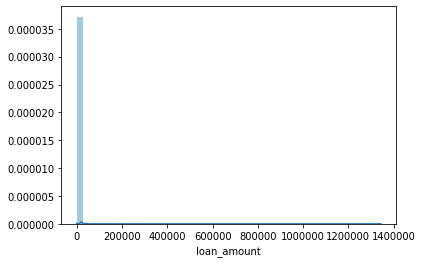

In [83]:
#target variable loan_amount
sc.distplot(df.loan_amount)

In [84]:
df.loan_amount.describe()

count    3.999900e+04
mean     8.412603e+03
std      1.359711e+04
min      1.000000e+02
25%      5.000000e+03
50%      8.000000e+03
75%      1.000000e+04
max      1.343000e+06
Name: loan_amount, dtype: float64

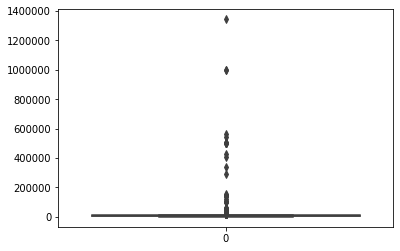

In [85]:
sc.boxplot(data=df.loan_amount)#we can see that there are outliers present in our data

In [86]:
df.loan_amount.max()

1343000.0

In [87]:
df[df.loan_amount>600000]#We need to check the outlier values in order to determine if we need to cap these values or keep 
#them as is.

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
30792,Shimoga,34,F,Traditional Weaving,Weaver,none,60000.0,5000.0,0,0,1.0,T1,2,300.0,1.0,1.0,Apparels,12,12,1000000.0
34584,Bhimanakone,35,F,Traditional Weaving,Weaver,none,60000.0,40000.0,0,0,1.0,R,4,300.0,1.0,1.0,Apparels,12,12,1000000.0
38857,test_city,50,F,annn,Collective of small farmers from tribal commun...,Agriculture,50000.0,3000.0,0,0,1.0,R,3,300.0,0.0,1.0,Agro Based Businesses,12,4,1343000.0


In [88]:
iqr=1.5*(df.loan_amount.quantile(0.75)-df.loan_amount.quantile(0.25))
max_val=iqr+df.loan_amount.quantile(0.75)
print(max_val,iqr,df.loan_amount.quantile(0.75),df.loan_amount.quantile(0.25))

17500.0 7500.0 10000.0 5000.0


In [89]:
df[df.loan_amount>max_val].shape

(203, 20)

In [90]:
df[df.loan_amount>15000].shape#we can see that there are only 211 records out of 40k which are > 15000 this means majority of
#the loan amount is <15000 so we can go ahead and cap these values 

(211, 20)

In [91]:
df[df.loan_amount<5000].shape

(1010, 20)

In [92]:
df.shape

(39999, 20)

In [93]:
df[df.loan_amount>max_val].nlargest(10,['loan_amount'])#printing the highest top 10 outliers which are present
#we can easily conclude from here that out of 40k people in our data sample there are only three memebers who have taken a loan above 10lkh
#hence we can cap any value above 500000 to 500000 

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
38857,test_city,50,F,annn,Collective of small farmers from tribal commun...,Agriculture,50000.0,3000.0,0,0,1.0,R,3,300.0,0.0,1.0,Agro Based Businesses,12,4,1343000.0
30792,Shimoga,34,F,Traditional Weaving,Weaver,none,60000.0,5000.0,0,0,1.0,T1,2,300.0,1.0,1.0,Apparels,12,12,1000000.0
34584,Bhimanakone,35,F,Traditional Weaving,Weaver,none,60000.0,40000.0,0,0,1.0,R,4,300.0,1.0,1.0,Apparels,12,12,1000000.0
31271,Thakurpukur,34,F,Traditional Weaving,Jute Work,none,40000.0,4000.0,0,0,1.0,R,4,400.0,1.0,1.0,Handicrafts,12,12,563000.0
33115,test_city,34,F,Traditional Weaving,Community Organization,none,30000.0,3000.0,0,0,1.0,R,4,300.0,1.0,1.0,Others,6,6,540000.0
29048,Shimoga,35,F,Traditional Weaving,Weaver,none,60000.0,5000.0,0,0,1.0,T2,5,300.0,0.0,0.5,Apparels,12,12,500000.0
29784,Shimoga,35,F,Traditional Weaving,Weaver,none,60000.0,5000.0,0,0,1.0,T2,5,300.0,0.0,0.5,Apparels,12,12,500000.0
31117,Varanasi,32,F,Traditional Weaving,Producer Group (Artisans),none,36000.0,4000.0,0,0,1.0,R,3,200.0,1.0,1.0,Handicrafts,3,1,500000.0
31355,Varanasi,34,F,Traditional Weaving,Producer Group (Artisans),none,36000.0,4000.0,0,0,1.0,T1,3,400.0,1.0,1.0,Handicrafts,3,1,500000.0
32090,Shimoga,35,F,Traditional Weaving,Weaver,Agriculture,36000.0,4500.0,0,0,1.0,R,4,200.0,1.0,1.0,Apparels,12,12,500000.0


In [94]:
df[df.loan_amount<max_val].nsmallest(10,['loan_amount'])#we can cap the lower end till 2000

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
33764,Shirwal,46,F,Sonar (OBC),Bakery,Others,85000.0,8000.0,0,0,1.0,R,2,500.0,1.0,1.0,Eateries,18,18,100.0
18975,Koppal,23,M,Lingayath,Education Loan,none,108000.0,8000.0,0,0,1.0,T1,4,3820.0,0.0,1.0,Education Loan,24,24,200.0
36592,Digras,29,F,Muslim,Cloth business,none,42000.0,2500.0,0,0,1.0,T2,2,400.0,1.0,1.0,Apparels,12,12,500.0
8148,Rajanapari,48,F,OBC,Bamboo craft,Others,0.0,2000.0,0,0,1.0,T2,0,0.0,0.0,0.0,Handicrafts,12,12,1000.0
8151,Rajanapari,25,F,OBC,Basket making business,Others,0.0,3000.0,0,0,1.0,T2,0,0.0,0.0,0.0,Handicrafts,12,12,1000.0
8167,Rajanapari,45,F,OBC,Basket making business,Others,0.0,3000.0,0,0,1.0,T2,0,0.0,0.0,0.0,Handicrafts,12,12,1000.0
8747,Kendrapara,34,F,OBC,Duck rearing,Others,0.0,3000.0,0,0,1.0,T2,0,0.0,0.0,0.0,Animal husbandry,12,12,1000.0
8750,Kendrapara,46,F,OBC,Poultry farm,Others,0.0,2000.0,0,0,1.0,T2,0,0.0,0.0,0.0,Meat Businesses,12,12,1000.0
8758,Kendrapara,44,F,OBC,Goat rearing,Others,0.0,5000.0,0,0,1.0,T2,0,0.0,0.0,0.0,Meat Businesses,12,12,1000.0
8808,Kendrapara,43,F,OBC,Poultry farm,Others,0.0,3000.0,0,0,0.0,R,0,0.0,0.0,0.0,Meat Businesses,12,12,1000.0


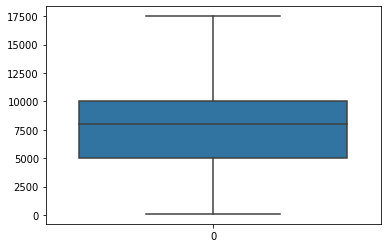

In [95]:
#handling outliers in our data
iqr=1.5*(df.loan_amount.quantile(0.75)-df.loan_amount.quantile(0.25))
q3=df.loan_amount.quantile(0.75)
q1=df.loan_amount.quantile(0.25)
df['loan_amount']=np.where(df.loan_amount<(q1-iqr),(q1-iqr),df.loan_amount)
df['loan_amount']=np.where(df.loan_amount>(q3+iqr),(q3+iqr),df.loan_amount)
#after removing the outliers we can now plot the boxplot
sc.boxplot(data=df.loan_amount)

In [96]:
df.loan_amount.max()#we have capped the value to 17500 

17500.0

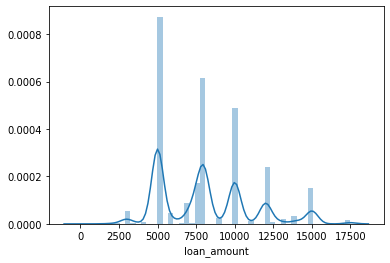

In [97]:
sc.distplot(df.loan_amount)

In [98]:
df.loan_amount.value_counts().head(20)#we can see that most of the values are small loans of 5 -15k

5000.0     12146
8000.0      8564
10000.0     6799
12000.0     3332
7500.0      2414
15000.0     2125
7000.0      1207
3000.0       730
6000.0       624
14000.0      442
9000.0       336
13000.0      293
17500.0      203
11000.0      186
4000.0       125
12600.0      101
2000.0        56
2500.0        42
6700.0        41
7300.0        39
Name: loan_amount, dtype: int64

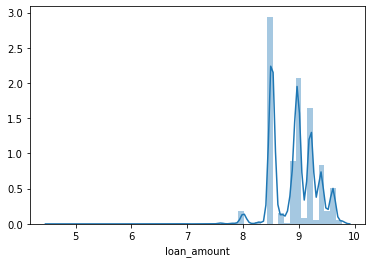

In [99]:
sc.distplot(np.log(df['loan_amount'])) #it is still skewed kinda

### Understanding which variables we want to use in our system

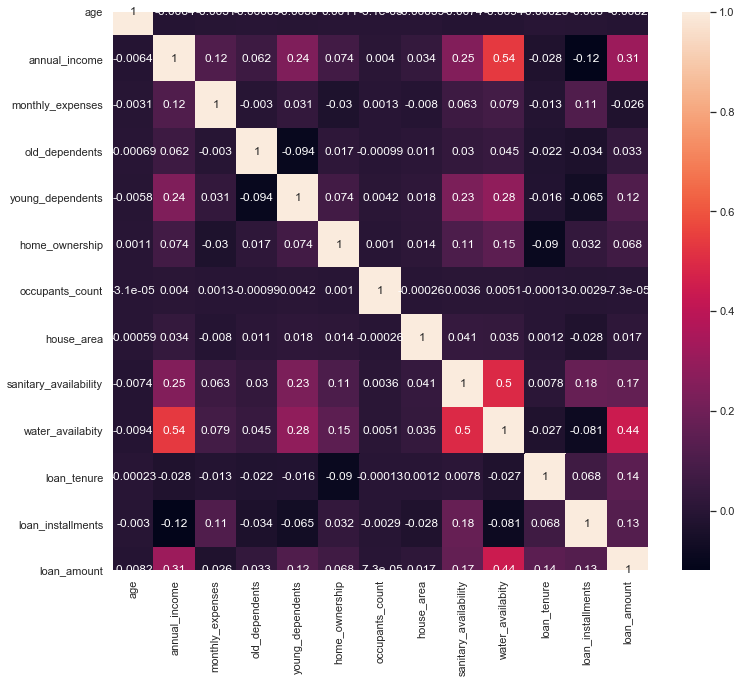

In [100]:
#We will now find the correlation values for the different variables which we have and will try and select which variables we should 
#go ahead with and which we can drop
corr_val=df.corr()
sc.set(rc={'figure.figsize':(12,10.27)})
sc.heatmap(data=corr_val,annot=True)
#we can see there are no numerical variables which are showing any high correlation with our target variable loan_amount
#we can also see hat young_dependents and old_dependents are highly correlated with each other.
#also water_availability and sanitary availability are highly correlated with each other.

In [101]:
#we can see from the heatmap only two variables water_availability and annual income have some correlation with loan_amount
model_1=ols('loan_amount~water_availabity+annual_income',data=df).fit()
model_1.summary()
#rsquared is 0.205 which means that roughly 20% of the variability in our data can be explained by this relationship.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.205
Model:                            OLS   Adj. R-squared:                  0.205
Method:                 Least Squares   F-statistic:                     5165.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        10:43:44   Log-Likelihood:            -3.7295e+05
No. Observations:               39999   AIC:                         7.459e+05
Df Residuals:                   39996   BIC:                         7.459e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         5469.7873     29.254    186.978      0.000    5412.450    5527.125
water_availabity  3379.6712     46.149     73.234      0.000    3289.218    3470.124
annual_income        0.0112      0.001     20.102      0.000       0.010       0.012
==============================================================================
Omnibus:                     3707.782   Durbin-Watson:                   0.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4877.224
Skew:                           0.799   Prob(JB):                         0.00
Kurtosis:                       3.613   Cond. No.                     1.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [102]:
#we have two strong options water_availability and annual income
df.dtypes

city                      object
age                        int64
sex                       object
social_class              object
primary_business          object
secondary_business        object
annual_income            float64
monthly_expenses         float64
old_dependents             int64
young_dependents           int64
home_ownership           float64
type_of_house             object
occupants_count            int64
house_area               float64
sanitary_availability    float64
water_availabity         float64
loan_purpose              object
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

In [103]:
df['water_availabity'].value_counts()

1.0    17782
0.5    16782
0.0     5435
Name: water_availabity, dtype: int64

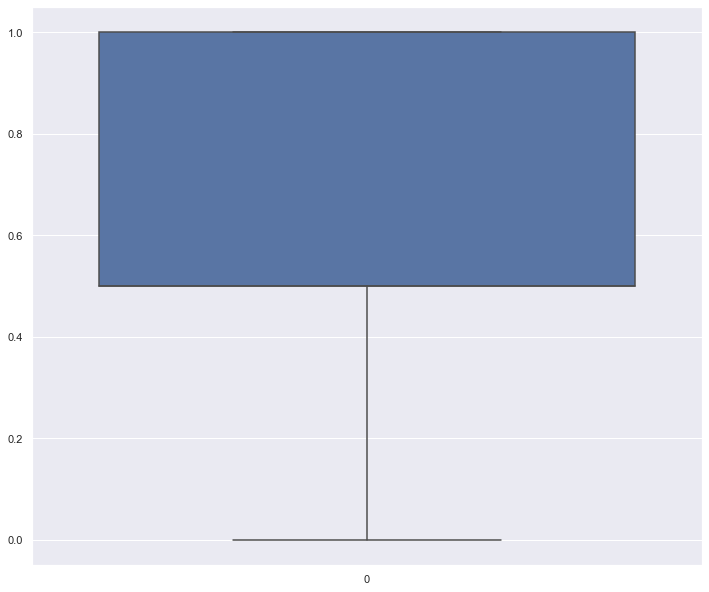

In [104]:
sc.boxplot(data=df.water_availabity)

In [105]:
df1=pd.get_dummies(df,columns=['loan_purpose'])
df1.head()

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,...,loan_purpose_Retail Sale,loan_purpose_Retail Store,loan_purpose_Sanitation,loan_purpose_Tent Services,loan_purpose_Tobacco Related Activities,loan_purpose_Training,loan_purpose_Transportation Services,loan_purpose_Tuition Centre,loan_purpose_Utensil Selling,loan_purpose_Vocational Loans
0,Dhanbad,22,F,Mochi,Tailoring,Others,36000.0,5000.0,0,2,...,0,0,0,0,0,0,0,0,0,0
1,Manjapra,21,F,OBC,Tailoring,none,94000.0,3600.0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Dhanbad,24,M,Nai,Beauty salon,Others,48000.0,4000.0,0,2,...,0,0,0,0,0,0,0,0,0,0
3,test_city,26,F,OBC,Tailoring,none,7000.0,5000.0,0,2,...,0,0,0,0,0,0,0,0,0,0
4,Nuapada,23,F,OBC,General store,Agriculture,36000.0,3500.0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [106]:
#let us now create dummy variables 
df.dtypes

city                      object
age                        int64
sex                       object
social_class              object
primary_business          object
secondary_business        object
annual_income            float64
monthly_expenses         float64
old_dependents             int64
young_dependents           int64
home_ownership           float64
type_of_house             object
occupants_count            int64
house_area               float64
sanitary_availability    float64
water_availabity         float64
loan_purpose              object
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

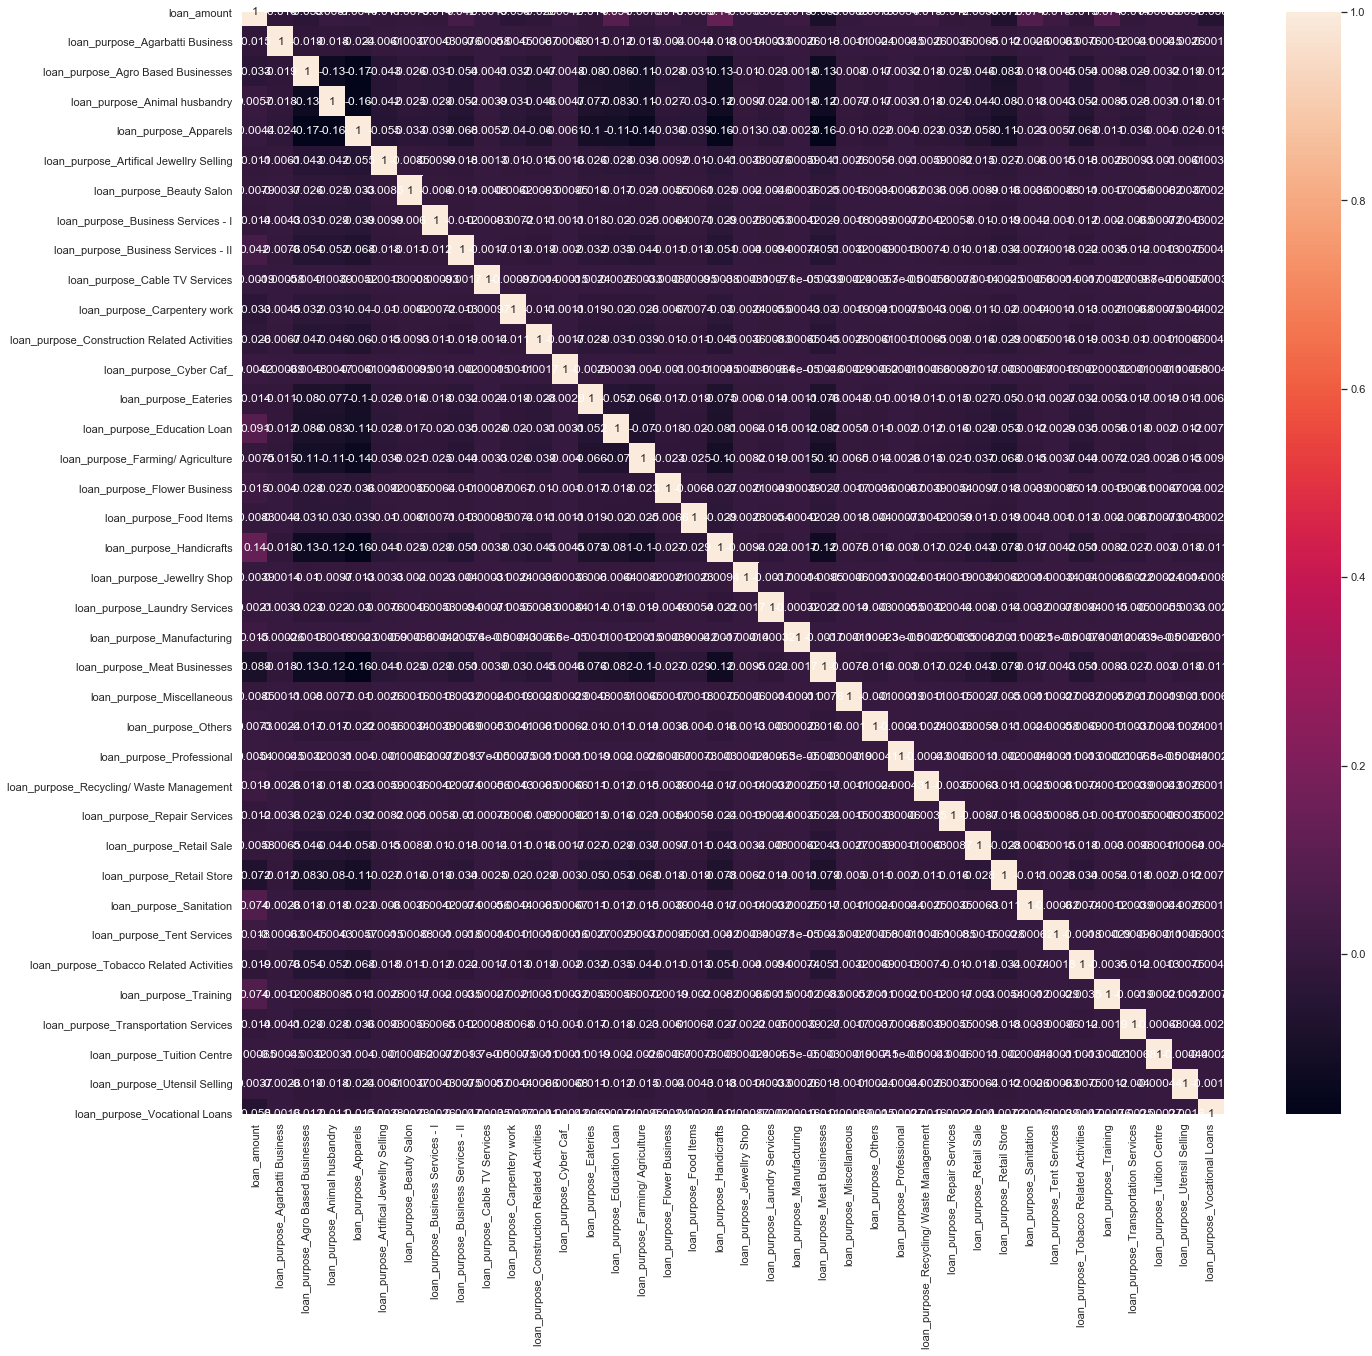

In [107]:
corr_vals=df1[[ 'loan_amount',
       'loan_purpose_Agarbatti Business', 'loan_purpose_Agro Based Businesses',
       'loan_purpose_Animal husbandry', 'loan_purpose_Apparels',
       'loan_purpose_Artifical Jewellry Selling', 'loan_purpose_Beauty Salon',
       'loan_purpose_Business Services - I',
       'loan_purpose_Business Services - II', 'loan_purpose_Cable TV Services',
       'loan_purpose_Carpentery work',
       'loan_purpose_Construction Related Activities',
       'loan_purpose_Cyber Caf_', 'loan_purpose_Eateries',
       'loan_purpose_Education Loan', 'loan_purpose_Farming/ Agriculture',
       'loan_purpose_Flower Business', 'loan_purpose_Food Items',
       'loan_purpose_Handicrafts', 'loan_purpose_Jewellry Shop',
       'loan_purpose_Laundry Services', 'loan_purpose_Manufacturing',
       'loan_purpose_Meat Businesses', 'loan_purpose_Miscellaneous',
       'loan_purpose_Others', 'loan_purpose_Professional',
       'loan_purpose_Recycling/ Waste Management',
       'loan_purpose_Repair Services', 'loan_purpose_Retail Sale',
       'loan_purpose_Retail Store', 'loan_purpose_Sanitation',
       'loan_purpose_Tent Services', 'loan_purpose_Tobacco Related Activities',
       'loan_purpose_Training', 'loan_purpose_Transportation Services',
       'loan_purpose_Tuition Centre', 'loan_purpose_Utensil Selling',
       'loan_purpose_Vocational Loans']].corr()

sc.set(rc={'figure.figsize':(22,20.27)})
sc.heatmap(data=corr_vals,annot=True)

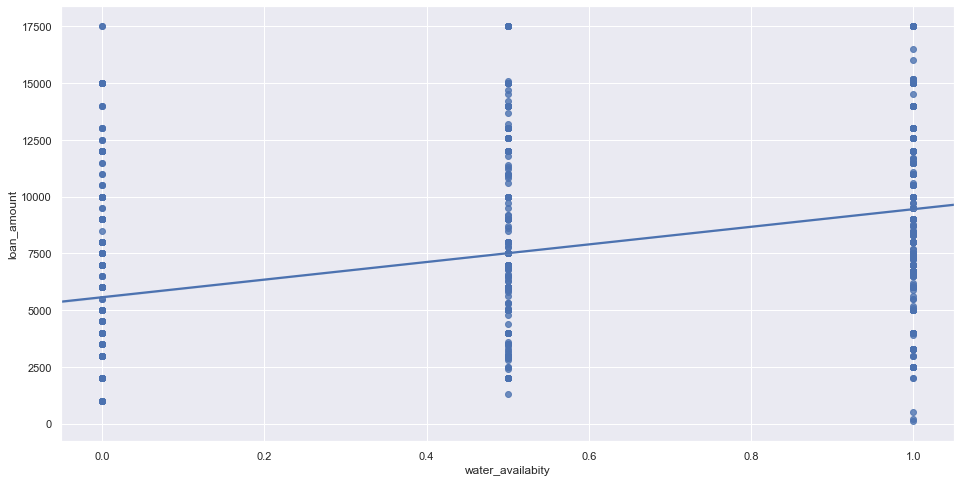

In [108]:
plt.figure(figsize=(16,8))
sc.regplot(y='loan_amount',x='water_availabity',data=df)

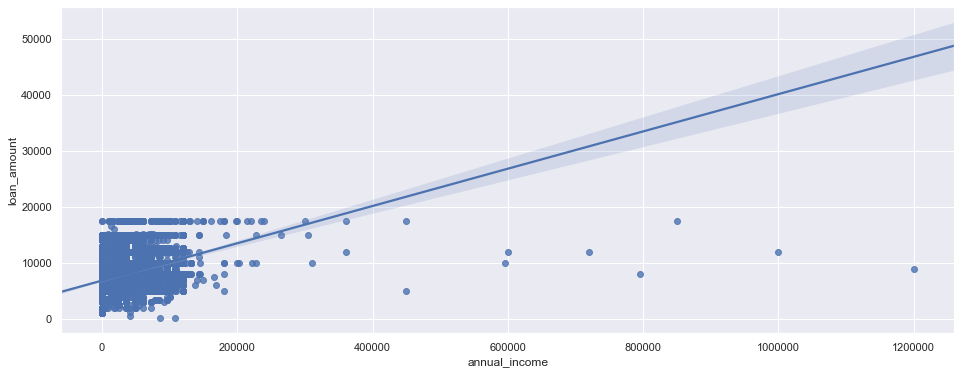

In [109]:
plt.figure(figsize=(16,6))
sc.regplot(y='loan_amount',x='annual_income',data=df)

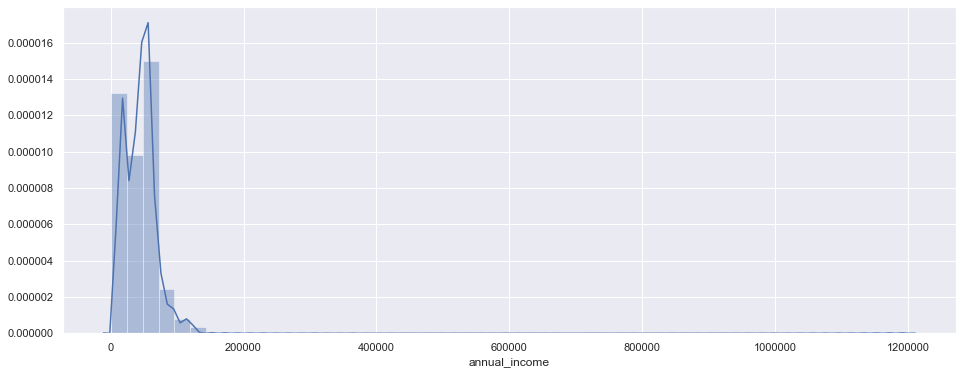

In [110]:
#we need to handle outliers in annual income
plt.figure(figsize=(16,6))
sc.distplot(df.annual_income)

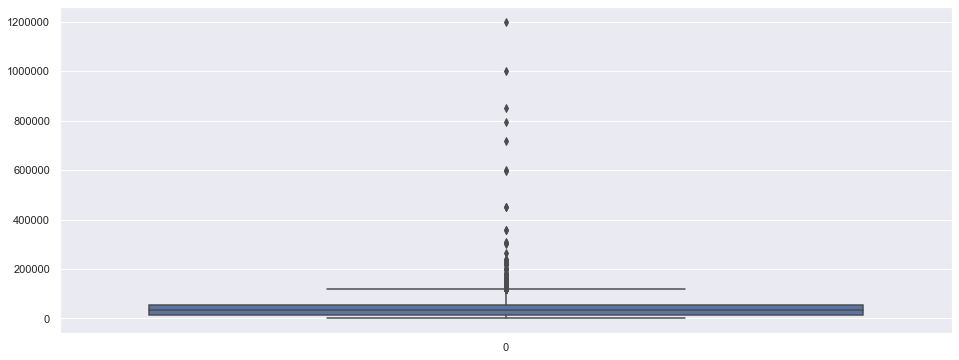

In [111]:
plt.figure(figsize=(16,6))
sc.boxplot(data=df.annual_income)#we can see that there are outliers present in our data

In [112]:
iqr=1.5*(df.annual_income.quantile(0.75)-df.annual_income.quantile(0.25))
max_val=iqr+df.annual_income.quantile(0.75)
df[df.annual_income>max_val].shape

(365, 20)

In [113]:
df[df.annual_income>max_val]

,city,age,sex,social_class,primary_business,secondary_business,annual_income,monthly_expenses,old_dependents,young_dependents,home_ownership,type_of_house,occupants_count,house_area,sanitary_availability,water_availabity,loan_purpose,loan_tenure,loan_installments,loan_amount
56,Palakkad,42,F,SC,Rice business,Others,165600.0,4000.0,0,0,1.0,T1,4,70.0,1.0,0.5,Agro Based Businesses,12,50,7500.0
1047,WADHAWAN,24,F,OBC,Cow Rearing,Livestock rearing,120000.0,3000.0,0,2,1.0,T2,6,280.0,1.0,0.5,Animal husbandry,12,12,5000.0
1050,WADHAWAN,34,F,OBC,Buffalo rearing,none,120000.0,5000.0,0,3,1.0,R,5,450.0,1.0,0.5,Animal husbandry,12,12,5000.0
1456,Jhabua,32,F,OBC,Grocery store,Others,120000.0,6500.0,1,0,1.0,T1,5,500.0,1.0,0.5,Agro Based Businesses,12,12,5000.0
2360,test_city,26,M,Genral,Plastic recycling,none,144000.0,8500.0,0,0,0.0,R,1,500.0,1.0,0.5,Recycling/ Waste Management,24,24,15000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39767,Gwalior,48,F,General,Readymade Garments,none,120000.0,9000.0,0,1,1.0,T1,3,500.0,1.0,1.0,Apparels,12,12,8000.0
39769,Gwalior,42,F,Sc,Tailoring,none,120000.0,9000.0,0,2,1.0,T1,4,250.0,1.0,1.0,Apparels,12,12,8000.0
39770,Gwalior,53,F,Sc,Vegetable vendor,none,120000.0,9000.0,0,0,1.0,R,4,500.0,1.0,1.0,Agro Based Businesses,12,12,8000.0
39772,Gwalior,50,F,Sc,Readymade Garments,none,120000.0,9200.0,0,0,1.0,T1,6,1100.0,1.0,1.0,Apparels,12,12,8000.0


In [114]:
max_val

118400.0

In [115]:
df[df.annual_income>200000].shape#only 23 people have an annual income of over 2 lkhs
#so we can capp these values

(23, 20)

62400.0 56000.0 14400.0


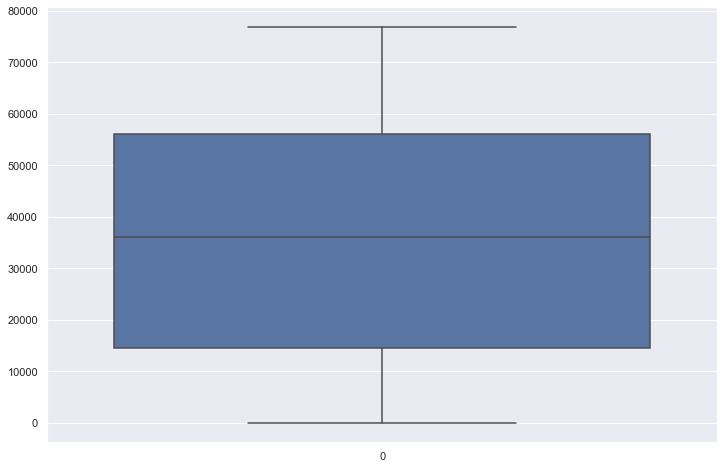

In [116]:
iqr=1.5*(df.annual_income.quantile(0.75)-df.annual_income.quantile(0.25))
q3=df.annual_income.quantile(0.75)
q1=df.annual_income.quantile(0.25)
print(iqr,q3,q1)
df['annual_income']=np.where(df.annual_income<(q1-iqr),(q1-iqr),df.annual_income)
df['annual_income']=np.where(df.annual_income>(q1+iqr),(q1+iqr),df.annual_income)
plt.figure(figsize=(12,8))
sc.boxplot(data=df.annual_income)#now we dont have any outliers present in the annnual income variable

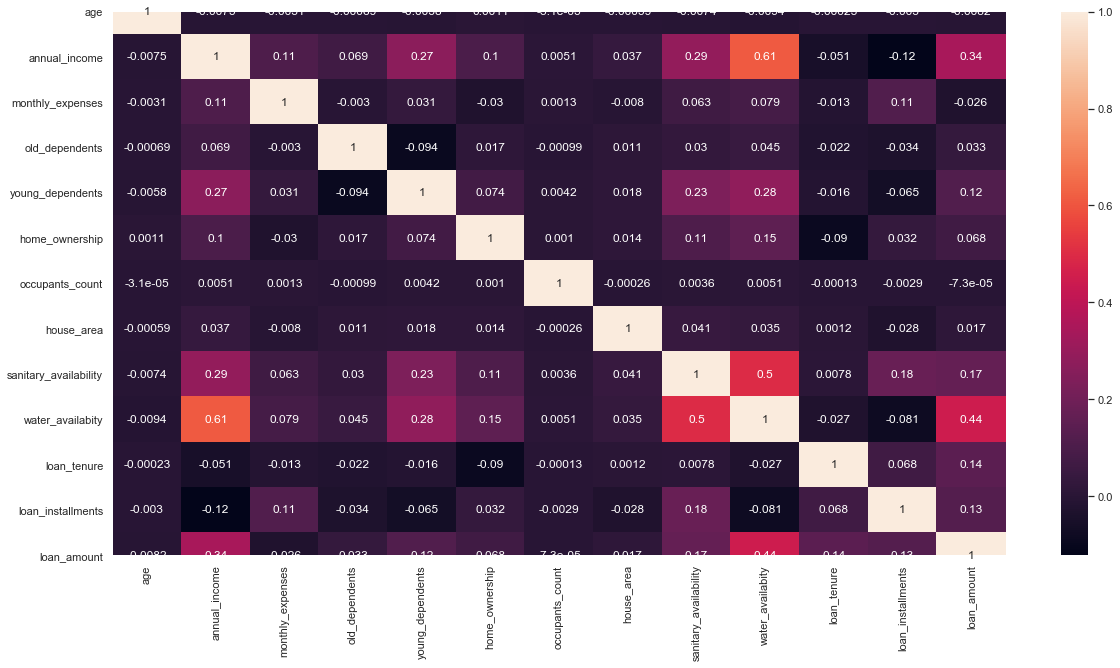

In [117]:
corr_vals=df.corr()
plt.figure(figsize=(20,10))
sc.heatmap(data=corr_vals,annot=True)#the colinearity increased between annual_income and water_availability as well as
#the correlation with our target variable also increased.

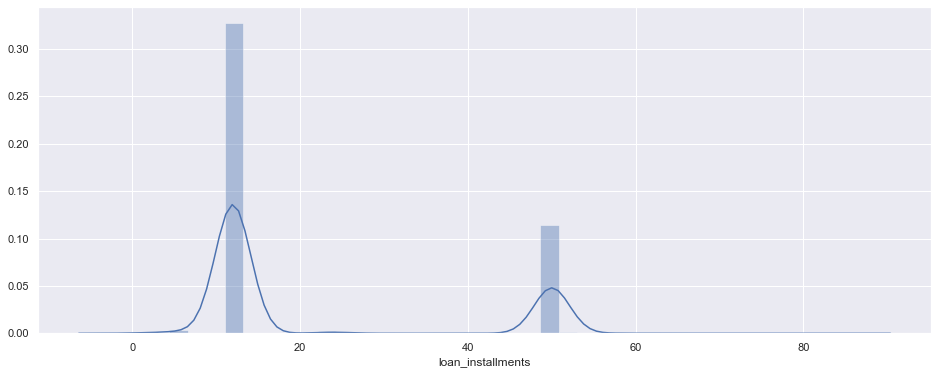

In [118]:
#loan installments
plt.figure(figsize=(16,6))
sc.distplot(df.loan_installments)

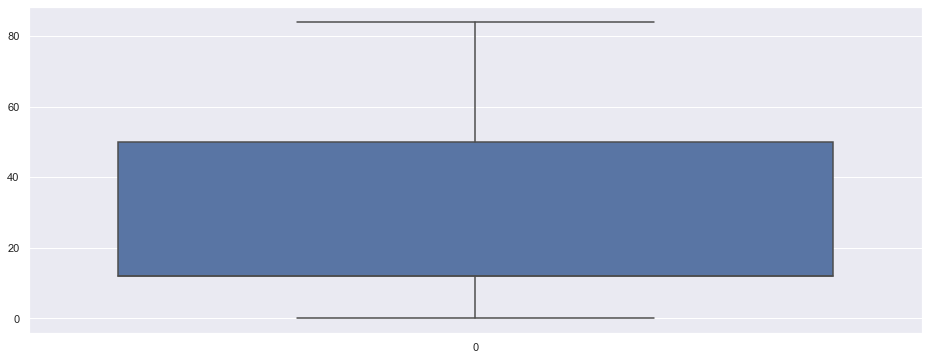

In [119]:
plt.figure(figsize=(16,6))
sc.boxplot(data=df.loan_installments)#no outliers present

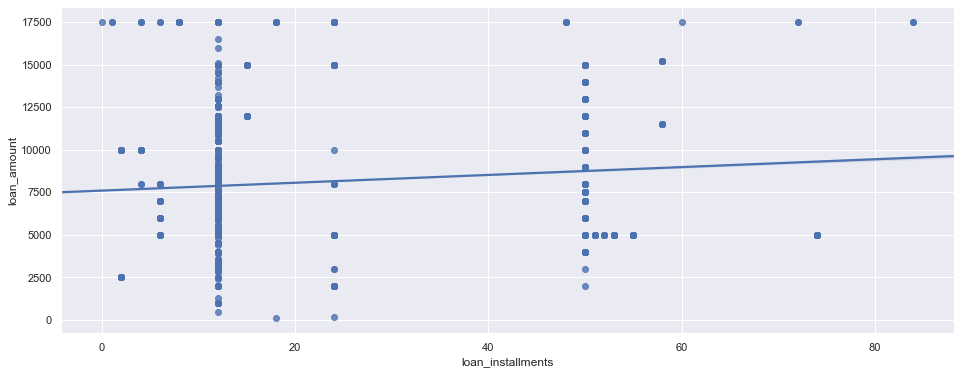

In [120]:
plt.figure(figsize=(16,6))
sc.regplot(x='loan_installments',y='loan_amount',data=df)

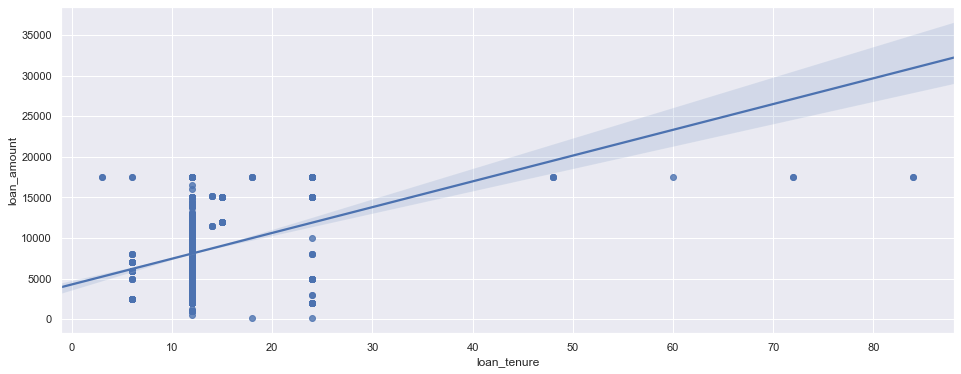

In [121]:
plt.figure(figsize=(16,6))
sc.regplot(x='loan_tenure',y='loan_amount',data=df)

In [122]:
print(df[df.loan_tenure>40].shape)
print(df[df.loan_tenure>24].shape)

(9, 20)
(9, 20)


In [123]:
df[df.loan_tenure==24].shape

(244, 20)

In [124]:
q3=df.loan_tenure.quantile(0.75)
iqr=1.5*(df.loan_tenure.quantile(0.75)-df.loan_tenure.quantile(0.25))
max_val=q3+iqr
print(max_val,q3,iqr)

12.0 12.0 0.0


In [125]:
df.loan_tenure.unique()

array([12, 24, 84,  6,  3, 18, 14, 15, 72, 60, 48], dtype=int64)

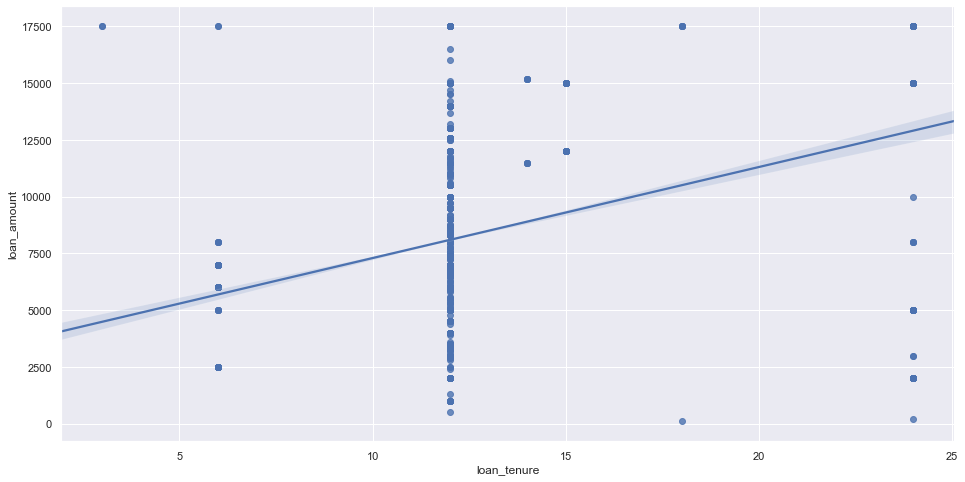

In [126]:
df['loan_tenure']=np.where(df.loan_tenure>24,24,df.loan_tenure)
plt.figure(figsize=(16,8))
sc.regplot(x='loan_tenure',y='loan_amount',data=df)

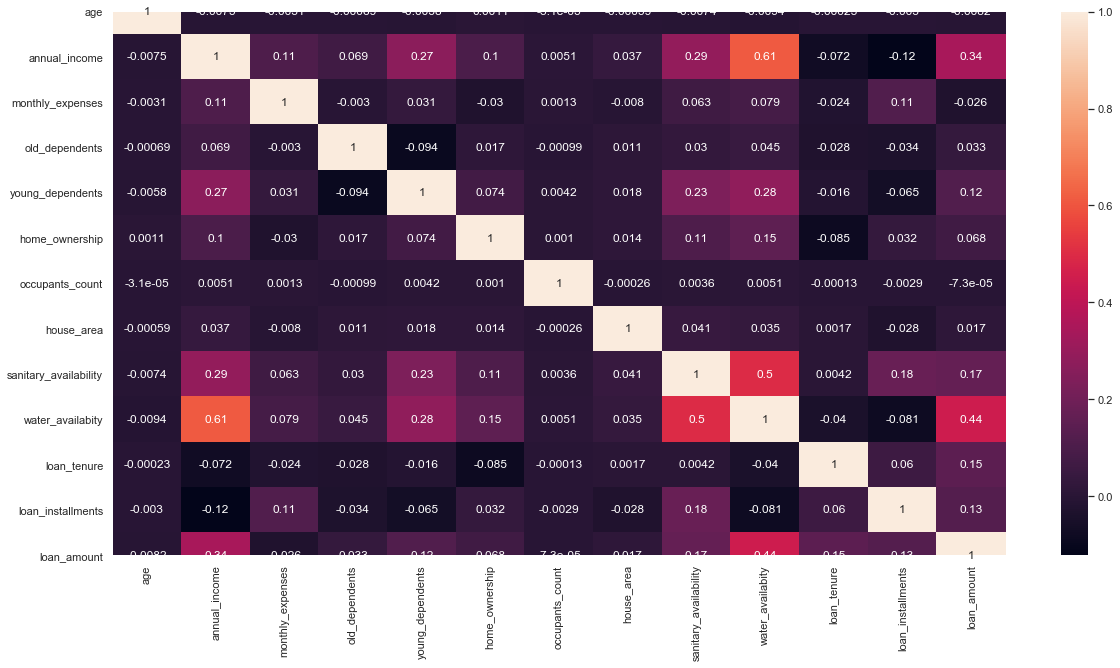

In [127]:
corr_vals=df.corr()
plt.figure(figsize=(20,10))
sc.heatmap(data=corr_vals,annot=True)#there is a slight increase in the correelation of loan_tenure with the target variable.

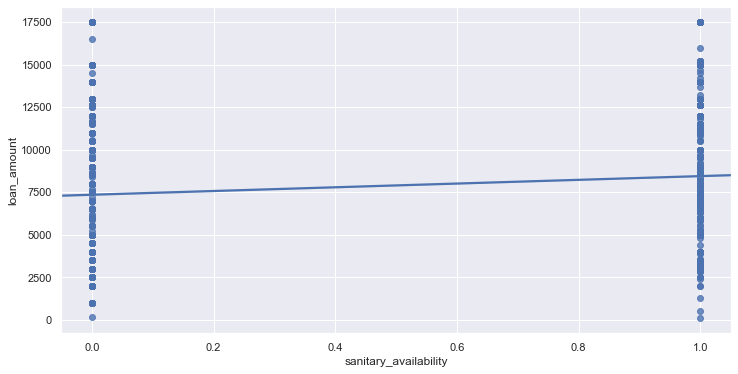

In [129]:
#we will try and convert this sanitary availability as a factor and then try and check if this variable is a good predictor of
#loan amount or not
df.dtypes

city                      object
age                        int64
sex                       object
social_class              object
primary_business          object
secondary_business        object
annual_income            float64
monthly_expenses         float64
old_dependents             int64
young_dependents           int64
home_ownership           float64
type_of_house             object
occupants_count            int64
house_area               float64
sanitary_availability    float64
water_availabity         float64
loan_purpose              object
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

In [130]:
df['water_availabity']=df['water_availabity'].astype(object)

In [131]:
df.dtypes#we can see that now water availability is a categorical datatype instead of a numeric one.

city                      object
age                        int64
sex                       object
social_class              object
primary_business          object
secondary_business        object
annual_income            float64
monthly_expenses         float64
old_dependents             int64
young_dependents           int64
home_ownership           float64
type_of_house             object
occupants_count            int64
house_area               float64
sanitary_availability    float64
water_availabity          object
loan_purpose              object
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

In [132]:
df.water_availabity.value_counts()

1.0    17782
0.5    16782
0.0     5435
Name: water_availabity, dtype: int64

In [135]:
#now we will rename 1.0 as high 0.5 as medium and 0.0 as low
df['water_availabity']=np.where(df.water_availabity==1.0,'High',df.water_availabity)
df['water_availabity']=np.where(df.water_availabity==0.5,'Medium',df.water_availabity)
df['water_availabity']=np.where(df.water_availabity==0.0,'Low',df.water_availabity)

In [136]:
df.water_availabity.value_counts()

High      17782
Medium    16782
Low        5435
Name: water_availabity, dtype: int64

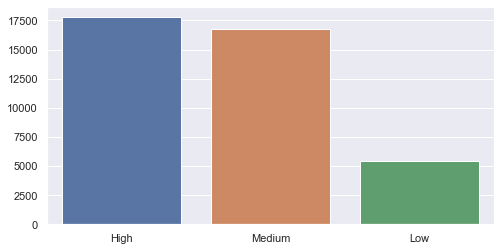

In [142]:
#let us now try and visualize this variable using  a barplot
water_avl=df.water_availabity.value_counts()
plt.figure(figsize=(8,4))
sc.barplot(water_avl.index,water_avl.values)

In [ ]:
#now to check how this will affect the correlation with our target variable 

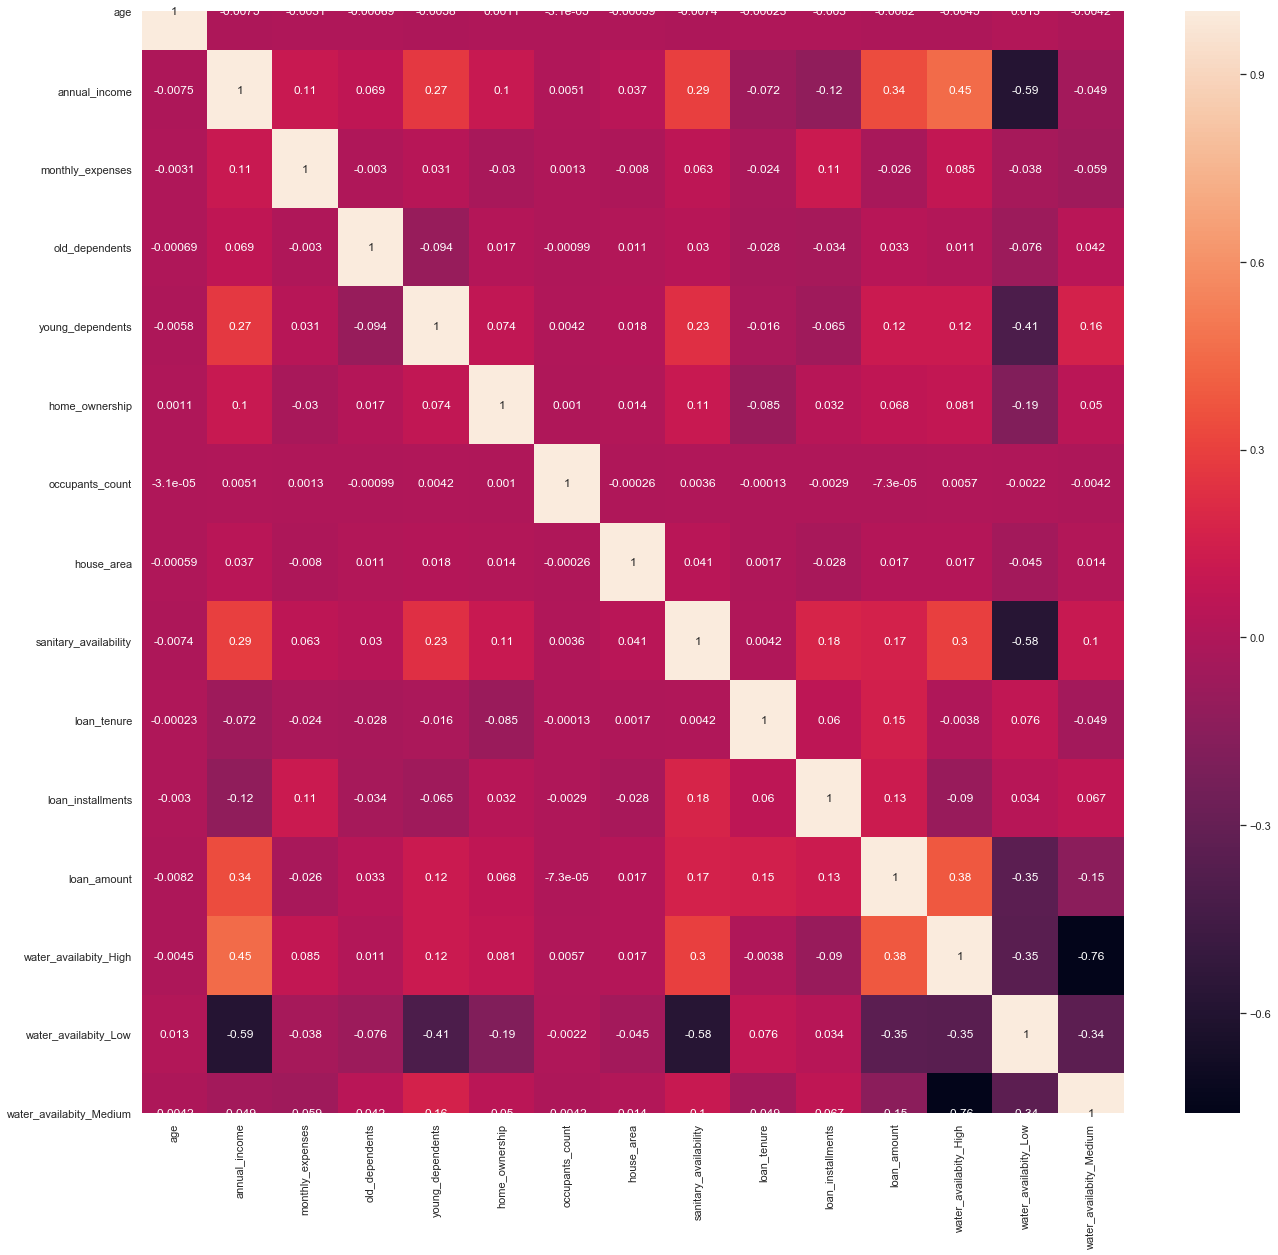

In [144]:
df1=df#creating a copy just in case
df1=pd.get_dummies(df1,columns=['water_availabity'])
corr_vals=df1.corr()
sc.heatmap(data=corr_vals,annot=True)
#we can see that it has increased the amount of correlation with our target variable.

In [146]:
#we will now have to check how much variability we can explain using this new relation 
model_2=ols('loan_amount~annual_income+loan_tenure+water_availabity_High+water_availabity_Low+water_availabity_Medium',data=df1).fit()
model_2.summary()#we can see that we have slightly improved on our rsquared value

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            loan_amount   R-squared:                       0.235
Model:                            OLS   Adj. R-squared:                  0.235
Method:                 Least Squares   F-statistic:                     3080.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):               0.00
Time:                        12:22:03   Log-Likelihood:            -3.7218e+05
No. Observations:               39999   AIC:                         7.444e+05
Df Residuals:                   39994   BIC:                         7.444e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1036.9603    109.394      9.479      0.000     822.546    1251.375
annual_income               0.0161      0.001     21.941      0.000       0.015       0.017
loan_tenure               467.5831     11.818     39.566      0.000     444.420     490.746
water_availabity_High    1977.0670     44.882     44.050      0.000    1889.096    2065.037
water_availabity_Low    -1330.8405     48.615    -27.375      0.000   -1426.128   -1235.553
water_availabity_Medium   390.7338     40.666      9.608      0.000     311.028     470.440
==============================================================================
Omnibus:                     2538.631   Durbin-Watson:                   0.839
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3101.684
Skew:                           0.632   Prob(JB):                         0.00
Kurtosis:                       3.513   Cond. No.                     2.11e+18
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.69e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

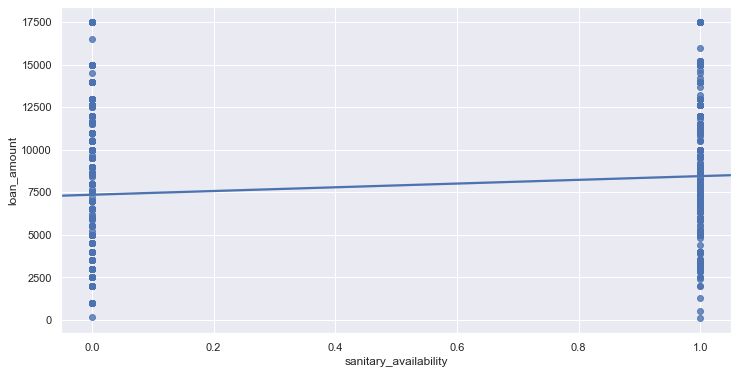

In [147]:
#Sanitary_availability variable
plt.figure(figsize=(12,6))
sc.regplot(x='sanitary_availability',y='loan_amount',data=df)#only 2 values possible 0 and 1

In [148]:
#what we can do here is we can convert sanitary_availability as a categorical variable having two levels
df['sanitary_availability']=df.sanitary_availability.astype(object)

In [149]:
df.dtypes

city                      object
age                        int64
sex                       object
social_class              object
primary_business          object
secondary_business        object
annual_income            float64
monthly_expenses         float64
old_dependents             int64
young_dependents           int64
home_ownership           float64
type_of_house             object
occupants_count            int64
house_area               float64
sanitary_availability     object
water_availabity          object
loan_purpose              object
loan_tenure                int64
loan_installments          int64
loan_amount              float64
dtype: object

In [150]:
df.sanitary_availability.value_counts()

1.0    27313
0.0    12686
Name: sanitary_availability, dtype: int64

In [ ]:
df['sanitary_availability']=np.where()